In [ ]:
##########################################################複製區塊
# import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import signal
from time import sleep
import sys
import meep as mp
import numpy as np

#setup some constants and parameters
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
T=30000
frq_min = 0
frq_max = 100
nfreq = 1000
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
#define square root of Dn function
def Dnsqt(wla,T):
    return np.sqrt(6*hdk**2*wla/(np.exp(hdk*wla/T)-1)/T**2/np.pi)

#generate an array of the square root of Dn function
Dsqt = []
for n in range(1,M):
    Dsqt.append(Dnsqt(2*np.pi*n/tsim,T))

#define how many times to run to average the results
Ncomp=5
nfreq =  1000
#define the starting sum of the result
Efsum = np.zeros(nfreq)
Ens = np.zeros(2*22)
resolution = 1000
sz = 4  
cell = mp.Vector3(0, 0, sz)
dpml = 1.0
pml_layers = [mp.PML(dpml)]
nq = 0


for i in range(Ncomp):
    
    def random_En(t):
        #generate random numbers
        M0 = np.random.normal(0,1)
        Mlp = np.random.normal(0,1,M-1)
        Nlp = np.random.normal(0,1,M-1)
        MM = np.random.normal(0,1)
    
        #generate the array of the fourier transform of E field, we generate l=0 and l=-M separately. 
        #for l=1 to M-1 and l=-1 to -(M-1) are conjutated to each other. 
        #we contruct the whole array by gluing them together by the order from l=0 -> l=M-1 -> l=-M -> l=-(m-1) -> l=-1
        Ef0 = np.array([M0*np.sqrt(6*hdk/np.pi/T)])
        Eflp = np.multiply((Mlp + 1j*Nlp), Dsqt)
        Eflm = np.flip(np.conjugate(Eflp))
        EfM = np.array([MM*Dnsqt(2*np.pi*M/tsim,T)])
        Ef = np.hstack((Ef0,Eflp,EfM,Eflm))
    
        #we normalize Ef and compute its inverse fast fourier transform
        Efn = deltap*T/np.sqrt(tsim)*Ef
        En = np.fft.ifft(Efn)*M
        return En
    En0 = random_En(1)
    En1 = random_En(1)
    #generate some feedback to check the progress of the loop
    x = i/Ncomp*100
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('m'*int(x), int(x)))
    sys.stdout.flush()
    sleep(0.0001)
    def source0(t):
        f = int(t*2000)
        return En0[f]
    def source1(t):
        f = int(t*2000)
        return En1[f]

    sources = [mp.Source(mp.CustomSource(src_func=source0),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz+dpml),
                     ),
              mp.Source(mp.CustomSource(src_func=source1),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,0.5*sz-dpml),
                     )
              ]
    
    sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions = 1,
                    Courant = 1,
                    resolution=resolution)
    

    # transmitted flux
    tran_fr = mp.FluxRegion(center=mp.Vector3(0,0,0))
    tran = sim.add_energy(fcen, df, nfreq, tran_fr)
    
    
    sim.run(until=2090)

    tran_flux = mp.get_magnetic_energy(tran)
    Ts = []
    for i in range(nfreq):
        Ts = np.append(Ts,tran_flux[i])    
    Efsum += Ts
    
    
    

#average the final result
Efavg = Efsum/Ncomp

#save data to some file or reload file to write more data on it
######################################################複製區塊


[                    ] 0%-----------
Initializing structure...
time for choose_chunkdivision = 0.00358105 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 4 with resolution 1000
time for set_epsilon = 0.00149488 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2090.0)

Meep progress: 15.691/2090.0 = 0.8% done in 4.0s, 528.8s to go
on time step 16353 (time=16.353), 0.000244623 s/step
Meep progress: 33.685/2090.0 = 1.6% done in 8.0s, 488.4s to go
on time step 35034 (time=35.034), 0.000214127 s/step
Meep progress: 62.469/2090.0 = 3.0% done in 12.0s, 389.5s to go
on time step 63819 (time=63.819), 0.000138963 s/step
Meep progress: 90.19200000000001/2090.0 = 4.3% done in 16.0s, 354.8s to go
on time step 90864 (time=90.864), 0.00014791 s/step
Meep progress: 110.188/2090.0 = 5.3% done in 20.0s, 359.4s to go
on time step 110725 (time=110.725), 0.000201426 s/step
Meep progress: 123.703/2090.0 = 5.9% done in 24.0s, 381.5s to go
on time step 124265 (time=124.265), 0.000295435 s/step
Meep progress: 137.129/2090.0 = 6.6% done in 28.0s, 398.8s to go
on time step 137762 (time=137.762), 0.000296406 s/step
Meep progress: 150.588/2090.0 = 7.2% done in 32.0s, 412.1s to go
on time step 151189 (time=151.189), 0.000297927 s/step
Meep progress: 164.108/2090.0 = 7.9% done in

FloatProgress(value=0.0, description='0% done ', max=2090.0)

Meep progress: 26.707/2090.0 = 1.3% done in 4.0s, 309.0s to go
on time step 26789 (time=26.789), 0.00014932 s/step
Meep progress: 53.676/2090.0 = 2.6% done in 8.0s, 303.5s to go
on time step 53762 (time=53.762), 0.0001483 s/step
Meep progress: 76.354/2090.0 = 3.7% done in 12.0s, 316.5s to go
on time step 76381 (time=76.381), 0.000176934 s/step
Meep progress: 91.146/2090.0 = 4.4% done in 16.0s, 350.9s to go
on time step 91219 (time=91.219), 0.00026959 s/step
Meep progress: 108.298/2090.0 = 5.2% done in 20.0s, 366.0s to go
on time step 108384 (time=108.384), 0.000233036 s/step
Meep progress: 125.306/2090.0 = 6.0% done in 24.0s, 376.3s to go
on time step 125397 (time=125.397), 0.000235125 s/step
Meep progress: 145.567/2090.0 = 7.0% done in 28.0s, 374.0s to go
on time step 145746 (time=145.746), 0.000196577 s/step
Meep progress: 176.25300000000001/2090.0 = 8.4% done in 32.0s, 347.5s to go
on time step 176435 (time=176.435), 0.000130343 s/step
Meep progress: 206.095/2090.0 = 9.9% done in 36

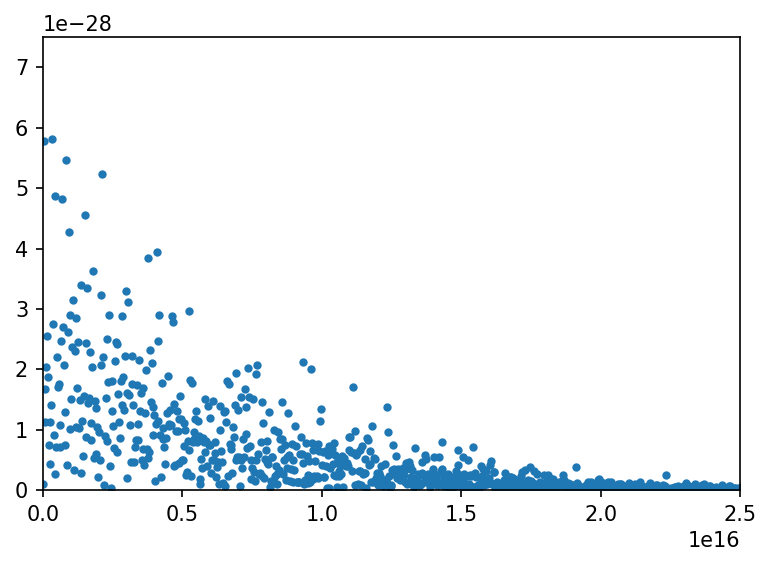

In [21]:
plt.figure(dpi=150)
freqs = np.linspace(0,30e15,1000)
plt.plot(freqs,Efavg*tsim*eps0*2*np.pi/2**21,'.')
plt.xlim(0,25e15)
plt.ylim(0,7.5e-28)
#plt.savefig('detector_vacuum_50000.png')
plt.show()

#np.savez("custom_source_vacuum_50000.npz", Efavg_50000 = Efavg)

Text(28.25, 0.5, 'Electric field source Es')

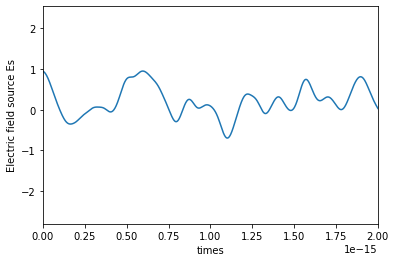

In [12]:
timess = np.linspace(0,7*1e-12,4194304)
plt.plot(timess,En1)
plt.xlim(0,2e-15)
#plt.ylim(-1e-6,1e-6)
plt.savefig('thermal_50000_tmie_M.png')
plt.xlabel('times')
plt.ylabel('Electric field source Es')

In [82]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('detector_vacuum_50000.png','trans_detector_vacuum_50000.png')